In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Define paths
base_path = os.path.abspath("../") # Your root directory
dataset_path = os.path.join(base_path, "dataset") # Your dataset folder
model_path = os.path.join(base_path, "models")
log_path = os.path.join(model_path, "aucs")
print(log_path)

/home/hasib/adv-cxr/models/aucs


In [2]:
# Helpers
import pickle 

def save_obj(obj, name):
    with open('{}'.format(log_path+"/") + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('{}'.format(log_path+"/") + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def get_unique(arr):
    '''
    Return unique elements in list
    '''
    arr = set(arr)
    return arr

#raw_features = load_obj('raw_features')
#target = load_obj('target')

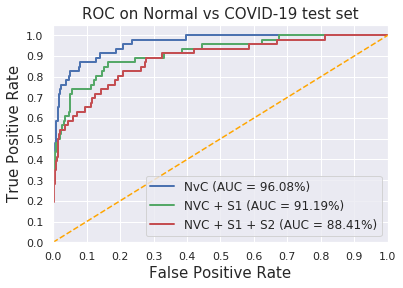

In [11]:
sss = load_obj('cxr_normalvcovid')
ess = load_obj('cxr_normalvcovid+g1')
siz = load_obj('cxr_normalvcovid+g1g2')

lw = 2
plt.figure()
labels = ['SSS', 'ESS', 'SIZ']
plt.plot(sss["fpr"], sss["tpr"], color='b', lw=lw, label='NvC (AUC = {0:.2f}%)'.format(sss["roc_auc"] * 100))
plt.plot(ess["fpr"], ess["tpr"], color='g', lw=lw, label='NVC + S1 (AUC = {0:.2f}%)'.format(ess["roc_auc"] * 100))
plt.plot(siz["fpr"], siz["tpr"], color='r', lw=lw, label='NVC + S1 + S2 (AUC = {0:.2f}%)'.format(siz["roc_auc"] * 100))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(prop={'size':12}, loc="lower right")
plt.title("ROC on Normal vs COVID-19 test set", fontsize=15)
plt.savefig("{}/auc_nvc.pdf".format(log_path), dpi=300)
plt.show()

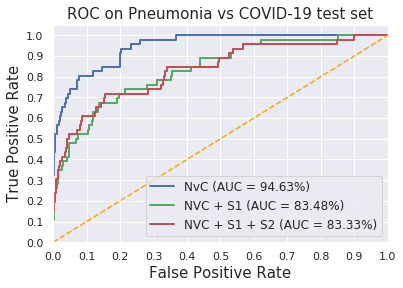

In [4]:
sss = load_obj('cxr_pneumoniavcovid')
ess = load_obj('cxr_pneumoniavcovid+g2')
siz = load_obj('cxr_pneumoniavcovid+g1g2')

lw = 2
plt.figure()
labels = ['SSS', 'ESS', 'SIZ']
plt.plot(sss["fpr"], sss["tpr"], color='b', lw=lw, label='NvC (AUC = {0:.2f}%)'.format(sss["roc_auc"] * 100))
plt.plot(ess["fpr"], ess["tpr"], color='g', lw=lw, label='NVC + S1 (AUC = {0:.2f}%)'.format(ess["roc_auc"] * 100))
plt.plot(siz["fpr"], siz["tpr"], color='r', lw=lw, label='NVC + S1 + S2 (AUC = {0:.2f}%)'.format(siz["roc_auc"] * 100))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(prop={'size':12}, loc="lower right")
plt.title("ROC on Pneumonia vs COVID-19 test set", fontsize=15)
plt.savefig("{}/auc_pvc.pdf".format(log_path), dpi=300)
plt.show()